<a href="https://colab.research.google.com/github/fariselkosyi/portofolio/blob/main/Histogram%20revenue%20Film.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing libraries

In [4]:
import os
import pandas as pd
import numpy as np
import io

from scipy import stats

import matplotlib.pyplot as plt

from matplotlib import pyplot as plt

import seaborn as sns




importing Data

In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [6]:
df = pd.read_csv('gdrive/MyDrive/Test/PS4_GamesSales.csv', header=0, encoding='unicode_escape')
df.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


cleaning data

In [7]:
for col in df.columns :
    percent_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col,round(percent_missing*100)))

Game - 0%
Year - 20%
Genre - 0%
Publisher - 20%
North America - 0%
Europe - 0%
Japan - 0%
Rest of World - 0%
Global - 0%


In [8]:
df = df.dropna()

Dropping Duplicates

In [9]:
df.drop_duplicates()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80
...,...,...,...,...,...,...,...,...,...
1025,Biomutant,2019.0,Action,THQ Nordic,0.00,0.00,0.00,0.00,0.00
1026,de Blob,2017.0,Platform,THQ Nordic,0.00,0.00,0.00,0.00,0.00
1027,Chaos on Deponia,2017.0,Adventure,Daedalic Entertainment,0.00,0.00,0.00,0.00,0.00
1028,Code Vein,2018.0,Action,Bandai Namco Entertainment,0.00,0.00,0.00,0.00,0.00


Grouping based on column Genre and Global

In [10]:
df = df[['Genre', 'Global']]
df.head(20)

,Genre,Global
0,Action,19.39
1,Shooter,15.09
2,Action-Adventure,13.94
3,Shooter,13.40
4,Sports,11.80
5,Sports,10.94
6,Action,10.33
7,Action-Adventure,8.76
8,Shooter,8.48
9,Role-Playing,8.48


check outlier

<Axes: >

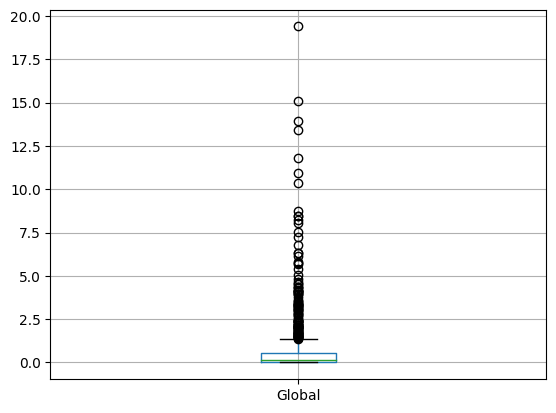

In [11]:
df.boxplot(column=['Global'])

Deleting Outlier


In [12]:
z_scores = stats.zscore(df['Global'])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3)
df = df[filtered_entries]

<Axes: >

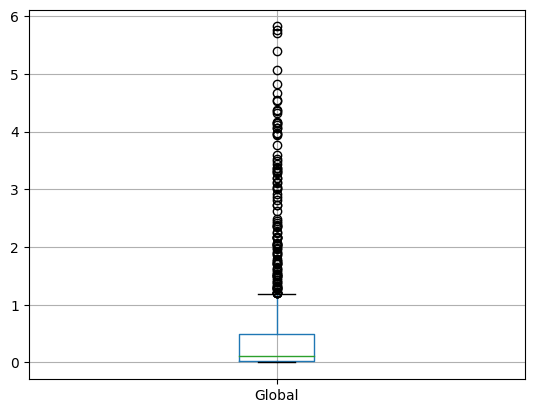

In [13]:
df.boxplot(column=['Global'])

In [14]:
df.head(100)

,Genre,Global
18,Action,5.82
19,Shooter,5.76
20,Action,5.70
21,Role-Playing,5.39
22,Role-Playing,5.07
...,...,...
113,Sports,1.31
114,Action-Adventure,1.29
115,Sports,1.29
116,Shooter,1.28


Checking data type

In [15]:
df.dtypes

Genre      object
Global    float64
dtype: object

Grouping by Genre

In [16]:
df.groupby(['Genre', 'Global'], as_index=False, )["Global"].count()


,Genre,Global
0,Action,33
1,Action,8
2,Action,10
3,Action,10
4,Action,7
...,...,...
455,Visual Novel,2
456,Visual Novel,2
457,Visual Novel,1
458,Visual Novel,1


In [17]:
df = df.set_index(['Genre'])

def grouper(x):
    return ''.join(x.lower().split())

In [18]:
df = df.groupby('Genre')['Global'].sum()


Making Histogram

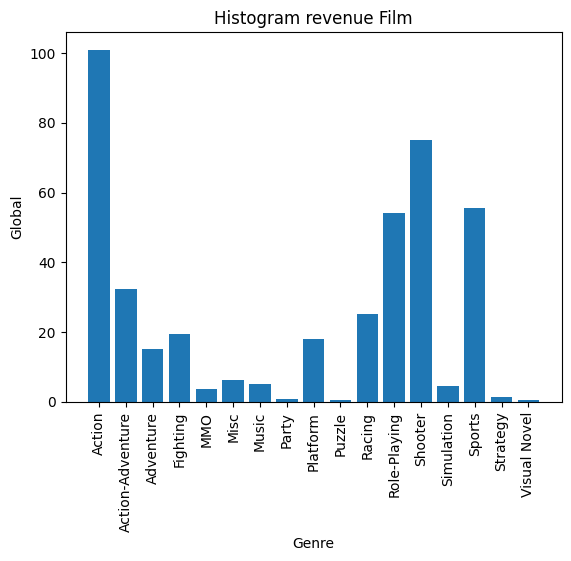

In [19]:
plt.bar(df.index, df.values)
plt.xlabel('Genre')
plt.ylabel('Global')
plt.title('Histogram revenue Film')

plt.xticks(rotation=90)

plt.show()